In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
import copy
from IPython.display import HTML,display
import pandas as pd

For a nxn lattice what is n?: 10
What percent of the lattice is filled?: 0.5


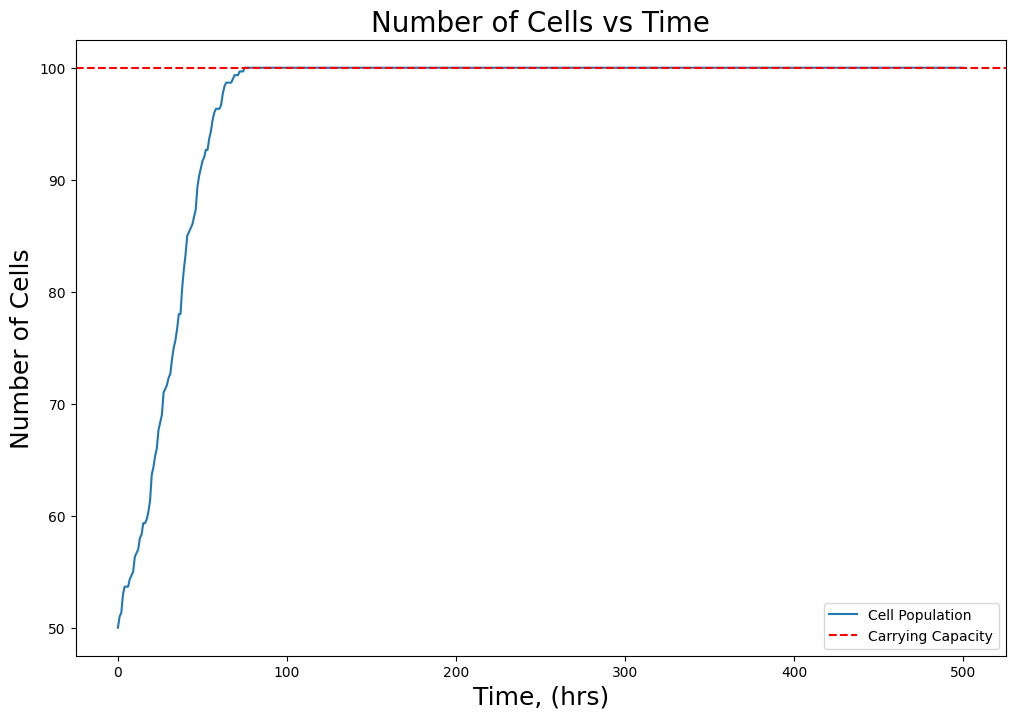

Enter the name of the file: none


NameError: name 'pd' is not defined

In [4]:
### SCRATCH ASSAY
class Cell:
    '''
    Define the characteristics of a cell:
    initial conditions - position age etc
    '''
    
    def __init__(self, x, y, prob, mu, type):
        '''define (x,y) position on the lattice, age and the self division time of the cell'''
        self.x = x
        self.y = y
        
        self.prob = prob
        if prob == 'poisson':
            self.division_time = int(np.round(np.random.poisson(mu))) # normal distribution of cell division time
        elif prob == 'normal':
            self.division_time = int(np.round(np.random.normal(mu, sigma=5))) # normal distribution of cell division time
            
        if type == 'Original':
            self.age = random.randint(0,self.division_time)
        elif type == 'New':
            self.age = 0
            
    def move(self, lattice):
        '''
        Describes how the cell moves on the lattice: cell can only move up,down left and right
        No two cells can be on the same lattice point
        '''
        p = 5 # how likely is a cell to move
        q = random.choice(range(0,10))
        if q >= p:
            direction = random.choice(['up', 'down', 'left', 'right'])

            current_x, current_y = self.x, self.y
            lattice[current_x,current_y] = True
                    
            if direction == 'up' and self.y + 1 < len(lattice) and not lattice[self.x, self.y + 1]:
                self.y += 1
            elif direction == 'down' and self.y - 1 >= 0 and not lattice[self.x, self.y - 1]:
                self.y -= 1
            elif direction == 'left' and self.x - 1 >= 0 and not lattice[self.x - 1, self.y]:
                self.x -= 1
            elif direction == 'right' and self.x + 1 < len(lattice) and not lattice[self.x + 1, self.y]:
                self.x += 1
    
            if current_x != self.x or current_y != self.y:
                # Set the old lattice position to False
                lattice[current_x, current_y] = False
                # Set the new lattice position to True
                lattice[self.x, self.y] = True
            
    def divide(self, lattice):
        '''
        Describes how a cell divides.
        This function identifies the existing available lattice points that could be occupied by a new cell
        Only neighbouring cells (Von Neuman neighbourhood) are considered
        '''
        available_positions = [] # create a list of available lattice points
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            new_x, new_y = self.x + dx, self.y + dy
            if 0 <= new_x < len(lattice) and 0 <= new_y < len(lattice[0]) and not lattice[new_x, new_y]:
                available_positions.append((new_x, new_y))

        if available_positions:
            new_x, new_y = random.choice(available_positions)
            new_cell = Cell(new_x, new_y, self.prob, mu, type = 'New')
            lattice[new_x, new_y] = True  # Mark the new cell's position as occupied
            return new_cell
        else:
            return None
            
def plot_cells(t, cells_list, lattice_size):
    '''
    Function to plot cells on a lattice square grid
    Sizes optimized for 10x10 but could be sized up
    '''
    plt.close('all') # Clear the previous plot
    current_cells = cells_list[t - 1]  # Get the cells at the specified time step
    
    plt.figure(figsize=(5, 5))

    for idx, cell in enumerate(current_cells):
        plt.scatter(cell.x, cell.y, label=f'Cell {idx + 1}', s=500)

    plt.title(f"Visualisation of the lattice at t={t} hrs")
    plt.grid(True, which='both', linewidth=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    plt.xlim(-1, lattice_size)
    plt.ylim(-1, lattice_size)
    plt.xticks(range(lattice_size))
    plt.yticks(range(lattice_size))
    plt.show()
    
def plot_cells_lrg(t, cells_list, lattice_size):
    '''
    Function to plot cells on a lattice square grid
    Sizes optimized for 10x10 but could be sized up
    '''
    plt.close('all') # Clear the previous plot
    current_cells = cells_list[t - 1]  # Get the cells at the specified time step
    
    plt.figure(figsize=(13,13))

    for idx, cell in enumerate(current_cells):
        plt.scatter(cell.x, cell.y, label=f'Cell {idx + 1}', s=20)

    plt.title(f"Visualisation of the lattice at t={t} hrs")
    plt.grid(True, which='both', linewidth=1)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    plt.xlim(-1, lattice_size)
    plt.ylim(-1, lattice_size)
    plt.xticks(range(lattice_size))
    plt.yticks(range(lattice_size))
    plt.show()
    
def plot_cells_vs_time_average(results,image_name):
    ''' Function to plot the density of cells vs time (1 iteration = 1 hour)'''
    avg_results = np.mean(np.array(results), axis = 0)
    plt.figure(figsize=(12, 8))
    plt.plot(results, label = 'Cell Population')
    plt.axhline(y=lattice_size**2, color='r', linestyle='--', label='Carrying Capacity',)
    plt.xlabel('Time, (hrs)',fontsize=18)
    plt.ylabel('Number of Cells',fontsize=18)
    plt.title('Number of Cells vs Time',fontsize=20)
    plt.legend()
    #plt.savefig(image_name)
    plt.show()


def simulate_movement(perc, t, lattice_size, prob,  mu, type):
    '''
    Function to simulate the movement of cells on the lattice
    Cells can move into available adjacent positions
    When a cell is old enough (self.division_time) a cell can divide into an availble lattice point
    If there are no available lattice points the cell does not divide
    '''
    
    lattice = np.zeros((lattice_size, lattice_size), dtype=bool)
    #coordinates = [(x,y) for y in range(int(lattice_size * perc/2 )) for x in range(lattice_size) ] + \
     #             [(x,y) for  y in range(int(lattice_size*(1 - perc/2)), lattice_size) for x in range(lattice_size-1,-1, -1)]
    coordinates = [(x,y) for y in range(int(lattice_size * perc)) for x in range(lattice_size) ]
    cells_list = []
    cells = [Cell(x, y, prob, mu, type) for x,y in coordinates]
    num_cells = int((lattice_size**2)*perc)
    num_cells_vs_time = [num_cells]
    cells_list.append(cells)
    
    for cell in cells[:]:
        lattice[cell.x, cell.y] = True
    for step in range(1, t + 1):
        new_cells = []
        for cell in cells[:]:
            lattice[cell.x, cell.y] = False  # Mark current position as empty
            
            cell.move(lattice)
            lattice[cell.x, cell.y] = True   # Mark new position as occupied
            
            cell.age += 1
            
        
            if cell.age%cell.division_time == 0:
                new_cell = cell.divide(lattice)
                if new_cell:
                    new_cells.append(new_cell)

        cells.extend(new_cells)
        num_cells_vs_time.append(len(cells))
        cells_list.append(cells)

    return (num_cells_vs_time, cells_list)
if __name__ == "__main__":
    t_max = 500
    num_simulations = 3
    lattice_size = int(input("For a nxn lattice what is n?:"))
    #lattice_size = 100
    # calculate the probability of duplication
    mu = 24
    #sigma = 5 # using poisson so not needed
    prob_p = 'poisson'
    prob_n = 'normal'
    
    perc = float(input("What percent of the lattice is filled?:"))
    type = 'Original'
    
    all_results = []
    
    for i in range(num_simulations):
        results, cell_list  = simulate_movement(perc, t_max, lattice_size, prob_p, mu, type)
        all_results.append(results)
        
   #(num_cells_vs_time, cells_list) = simulate_movement(perc, t_max, lattice_size, prob_p, mu, type)
    avg_results = np.mean(np.array(all_results), axis = 0)
    
    #plot_name = input("Enter the name of the plot:")
    #image_name = f"{plot_name}.png"
 
    plot_cells_vs_time_average(avg_results, image_name)
    #print(num_cells_vs_time)
   
    #t_value = widgets.IntText(value=1, min=1, max=t_max, step=1, description='t:')
    #interact(plot_cells_lrg, t=t_value, cells_list=widgets.fixed(cells_list), lattice_size=widgets.fixed(lattice_size));
# Your constant path

base_path = "C:\\Users\\aedin\\College\\"
    
# Generate a dynamic file name
file_name = input("Enter the name of the file:")
    
#full_path = f"{base_path}{file_name}.xlsx"
    
initial_conditions = {
        "Lattice Size": lattice_size**2,
        "Percentage of lattice covered by cells": perc*100,
        "Initial Number of Cells": perc*lattice_size**2,
        "Time": t_max,
        "Number of Simulations": num_simulations,
        "Mean Cell Division Time": mu
    }



#df = pd.DataFrame(all_results).T
   

#with pd.ExcelWriter(full_path, engine="openpyxl") as writer:
        # Write the initial conditions to the Excel file
 #   pd.DataFrame.from_dict(initial_conditions, orient='index', columns=['Initial Conditions']).to_excel(writer, sheet_name='Info')

    #Write the simulation results to the Excel file
  #  df.to_excel(writer, sheet_name='Experimental data', startrow=3, startcol=0, engine="openpyxl")
    